# Import  the Packages

In [4]:
import keras
import os
from keras.utils import to_categorical
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization

# Create Images and Labels array

In [5]:
dataset_path = 'Dataset'

# Initialize empty arrays to store images and labels
images = []
labels = []

# Initialize a dictionary to map class names to indices
class_index = {}

# Iterate through each directory (class) in the dataset directory
for index, class_name in enumerate(os.listdir(dataset_path)):
    class_path = os.path.join(dataset_path, class_name)
    
    # Skip if the current path is not a directory
    if not os.path.isdir(class_path):
        continue
    
    # Map class name to index
    class_index[class_name] = index
    
    # Iterate through each image in the current class directory
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        
        # Read the image using OpenCV
        image = cv2.imread(image_path)
        
        #resize the image 
        image = cv2.resize(image, (32, 32))
        
        # Append the image to the images array
        images.append(image)
        
        # Append the index corresponding to the class name to the labels array
        labels.append(index)

# Convert the images array to a numpy array

In [6]:
images = np.array(images)

# Convert the labels into one_hot_encoding

In [7]:
# Convert the labels array to a numpy array
labels = np.array(labels)
labels_one_hot = to_categorical(labels)

# Printing shape of the arrays

In [8]:
print("Shape of images array:", images.shape)
print("Shape of labels array:", labels.shape)
print("Shape of labels array:", labels_one_hot.shape)

print("Class index mapping:", class_index)

Shape of images array: (891, 32, 32, 3)
Shape of labels array: (891,)
Shape of labels array: (891, 15)
Class index mapping: {'Atelectasis': 0, 'Cardiomegaly': 1, 'Consolidation': 2, 'Edema': 3, 'Effusion': 4, 'Emphysema': 5, 'Fibrosis': 6, 'Hernia': 7, 'Infiltration': 8, 'Mass': 9, 'No Finding': 10, 'Nodule': 11, 'Pleural_Thickening': 12, 'Pneumonia': 13, 'Pneumothorax': 14}


In [9]:
labels_one_hot


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [10]:
dataset_path = 'Dataset'  

min_images_threshold = 500

# Initialize a dictionary to map class names to indices and count the number of images per class
class_index = {}
class_image_count = {}
# Iterate through each directory (class) in the dataset directory
for index, class_name in enumerate(os.listdir(dataset_path)):
    class_path = os.path.join(dataset_path, class_name)
    
    # Skip if the current path is not a directory
    if not os.path.isdir(class_path):
        continue
    
    # Count the number of images in the current class
    image_count = len(os.listdir(class_path))
    class_image_count[class_name] = image_count
    class_index[class_name] = index
    
class_image_count

{'Atelectasis': 60,
 'Cardiomegaly': 60,
 'Consolidation': 60,
 'Edema': 51,
 'Effusion': 60,
 'Emphysema': 60,
 'Fibrosis': 60,
 'Hernia': 60,
 'Infiltration': 60,
 'Mass': 60,
 'No Finding': 60,
 'Nodule': 60,
 'Pleural_Thickening': 60,
 'Pneumonia': 60,
 'Pneumothorax': 60}

In [11]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

In [12]:
len(class_index)

15

# Normalising the image array Generating the augumented images and labels

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
if len(labels) == 0:
    raise ValueError("No images found in the dataset directory.")

# Normalize images
images = images / 255.

# Apply data augmentation selectively for classes with fewer images
augmented_images = []
augmented_labels = []

for class_name, image_count in class_image_count.items():
    # Skip classes with sufficient data
    if image_count >= min_images_threshold:
        continue
    
    # Create ImageDataGenerator instance for the current class
    datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='constant',
        cval=125
    )
    
    # Generate augmented data for the current class
    class_path = os.path.join(dataset_path, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (32, 32))
        image = np.expand_dims(image, axis=0)
        x=0;
        for batch in datagen.flow(image, batch_size=32):
            augmented_images.append(batch[0])
            augmented_labels.append(class_index[class_name])
            x+=1
            if(x>30):
                x=0
                break
              # Ensure only one augmentation per original image

# Convert augmented images and labels arrays to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# One-hot encode labels for both original and augmented data
labels_one_hot = to_categorical(labels, num_classes=len(class_index))
augmented_labels_one_hot = to_categorical(augmented_labels, num_classes=len(class_index))

# Concating the augumented and original arrays

In [14]:
# Concatenate original and augmented data
final_images = np.concatenate((images, augmented_images), axis=0)
final_labels = np.concatenate((labels_one_hot, augmented_labels_one_hot), axis=0)

# Shuffling data 

In [15]:
# Shuffle the data (optional)
shuffle_indices = np.random.permutation(len(final_images))
final_images = final_images[shuffle_indices]
final_labels = final_labels[shuffle_indices]

In [16]:
augmented_images

array([[[[  5.       ,   5.       ,   5.       ],
         [  4.657833 ,   4.657833 ,   4.657833 ],
         [  2.3275304,   2.3275304,   2.3275304],
         ...,
         [  4.677047 ,   4.677047 ,   4.677047 ],
         [  4.9798093,   4.9798093,   4.9798093],
         [  3.2743735,   3.2743735,   3.2743735]],

        [[  4.201373 ,   4.201373 ,   4.201373 ],
         [  3.1165912,   3.1165912,   3.1165912],
         [  0.8619452,   0.8619452,   0.8619452],
         ...,
         [  2.7826416,   2.7826416,   2.7826416],
         [  3.423877 ,   3.423877 ,   3.423877 ],
         [  2.2742083,   2.2742083,   2.2742083]],

        [[  5.3099065,   5.3099065,   5.3099065],
         [ 11.830714 ,  11.830714 ,  11.830714 ],
         [ 25.46709  ,  25.46709  ,  25.46709  ],
         ...,
         [ 12.512527 ,  12.512527 ,  12.512527 ],
         [  8.820781 ,   8.820781 ,   8.820781 ],
         [  2.1905513,   2.1905513,   2.1905513]],

        ...,

        [[  3.6157968,   3.6157968,   

In [17]:
augmented_labels_one_hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [18]:
len(labels_one_hot)

891

# Splitting dataset into train, test and validation set

In [19]:
SIZE = 224

from sklearn.model_selection import train_test_split

# split the data into training/validation and test sets (80/20 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(final_images, final_labels, test_size=0.2, random_state=42)

# Then, split the training/validation set into separate training and validation sets (80/20 split of the 80%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Normalising the train, test and validation set

In [20]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (17106, 32, 32, 3)
Validation set size: (5703, 32, 32, 3)
Test set size: (5703, 32, 32, 3)


# Defining Densenet model architecture

In [21]:
from keras.applications import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

# Step 1: Define the DenseNet model architecture
base_model = DenseNet121(weights='imagenet' , include_top=False)  # Load pre-trained weights from ImageNet

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(15, activation='sigmoid')(x)  # Output layer

model = Model(inputs=base_model.input, outputs=predictions)

from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001) 
metrics = ['accuracy', 'precision', 'recall', 'f1_score']

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=metrics)

In [22]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, None, None, 3)     │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, None, None, 3)     │               0 │ input_layer[0][0]          │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, None, None, 64)    │           9,408 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, None, None, 64)    │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, None, None, 64)    │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_1              │ (None, None, None, 64)    │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, None, None, 64)    │               0 │ zero_padding2d_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, None, None, 64)    │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, None, None, 64)    │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, None, None, 128)   │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, None, None, 128)   │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, None, None, 128)   │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, None, None, 32)    │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, None, None, 96)    │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 8,102,479 (30.91 MB)

 Trainable params: 8,018,831 (30.59 MB)

 Non-trainable params: 83,648 (326.75 KB)

# Tried self made model but accuracy was very less

In [23]:
# model = Sequential()

# model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE, SIZE, 3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(5, activation='sigmoid'))


# #Do not use softmax for multilabel classification
# #Softmax is useful for mutually exclusive classes, either cat or dog but not both.
# #Also, softmax outputs all add to 1. So good for multi class problems where each
# #class is given a probability and all add to 1. Highest one wins. 

# #Sigmoid outputs probability. Can be used for non-mutually exclusive problems.
# #like multi label, in this example.
# #But, also good for binary mutually exclusive (cat or not cat). 

# model.summary()

#Binary cross entropy of each label. So no really a binary classification problem but
#Calculating binary cross entropy for each label. 
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#

# Model Training

In [24]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 153s 160ms/step - accuracy: 0.1324 - f1_score: 0.1304 - loss: 0.2705 - precision: 0.1397 - recall: 0.0234 - val_accuracy: 0.2600 - val_f1_score: 0.2455 - val_loss: 0.2180 - val_precision: 0.6302 - val_recall: 0.0607
Epoch 2/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 83s 156ms/step - accuracy: 0.4449 - f1_score: 0.4439 - loss: 0.1745 - precision: 0.8000 - recall: 0.1800 - val_accuracy: 0.6737 - val_f1_score: 0.6734 - val_loss: 0.1298 - val_precision: 0.8341 - val_recall: 0.5150
Epoch 3/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 81s 152ms/step - accuracy: 0.7751 - f1_score: 0.7752 - loss: 0.0877 - precision: 0.8934 - recall: 0.6199 - val_accuracy: 0.9039 - val_f1_score: 0.9067 - val_loss: 0.0443 - val_precision: 0.9077 - val_recall: 0.8636
Epoch 4/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 82s 152ms/step - accuracy: 0.8999 - f1_score: 0.9001 - loss: 0.0445 - precision: 0.9489 - recall: 0.8352 - val_accuracy: 0.9246 - val_f1_score: 0.9270 - val_loss: 0.0398 - val_precision: 0.9217 

# Plotting training and validation accuracy and loss at each epoch

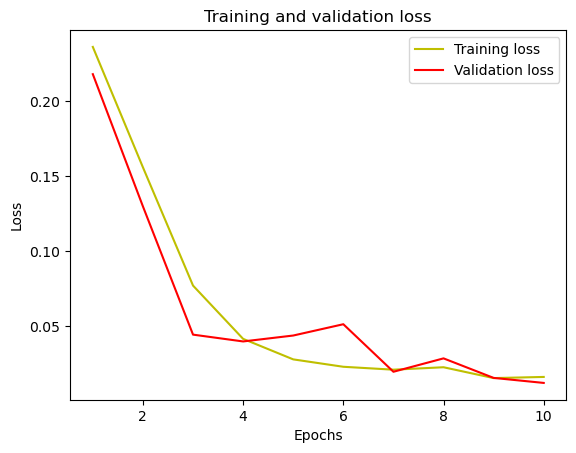

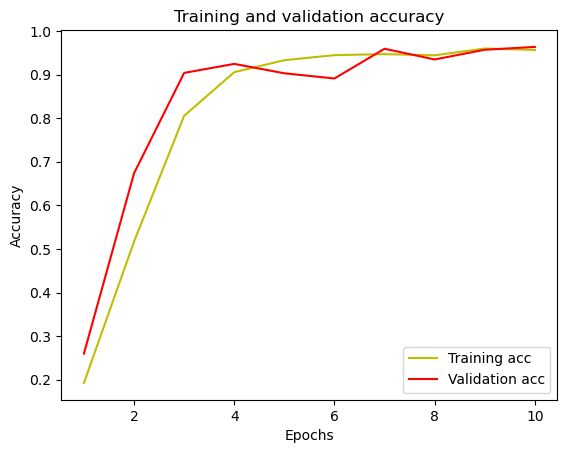

In [25]:

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Testing Results (Loss, Accuracy, Precision, Recall, AUC)

In [26]:
# Evaluate the model on the test set
evaluation_metrics = model.evaluate(X_test, y_test, verbose=1)

test_loss = evaluation_metrics[0]
test_accuracy = evaluation_metrics[1]
test_precision = evaluation_metrics[2]
test_recall = evaluation_metrics[3]
test_auc = evaluation_metrics[4]

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test AUC: {test_auc}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.9639 - f1_score: 0.9669 - loss: 0.0123 - precision: 0.9905 - recall: 0.9592
Test Loss: 0.013036370277404785
Test Accuracy: 0.9614238142967224
Test Precision: 0.9901907444000244
Test Recall: 0.9558127522468567
Test AUC: [0.98391414 0.80538297 0.972752   0.9825119  0.9674185  0.9747675
 0.97542036 0.97157615 0.9786628  0.97931033 0.97872335 0.9804941
 0.97157615 0.9771197  0.97001296]


# Printing Classification Report and Confusion Matrix

179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step
                    precision    recall  f1-score   support

      Cardiomegaly       0.99      0.98      0.98       376
         Emphysema       0.67      1.00      0.81       389
          Effusion       1.00      0.95      0.97       377
            Hernia       1.00      0.97      0.98       319
      Infiltration       0.98      0.96      0.97       404
              Mass       0.99      0.96      0.97       382
        No Finding       0.99      0.96      0.98       393
            Nodule       1.00      0.95      0.97       397
       Atelectasis       0.99      0.96      0.98       357
      Pneumothorax       0.99      0.96      0.98       368
Pleural_Thickening       1.00      0.96      0.98       384
         Pneumonia       1.00      0.96      0.98       392
          Fibrosis       0.99      0.96      0.97       393
             Edema       0.99      0.96      0.98       377
     Consolidation       1.00      0.94      0.97       3

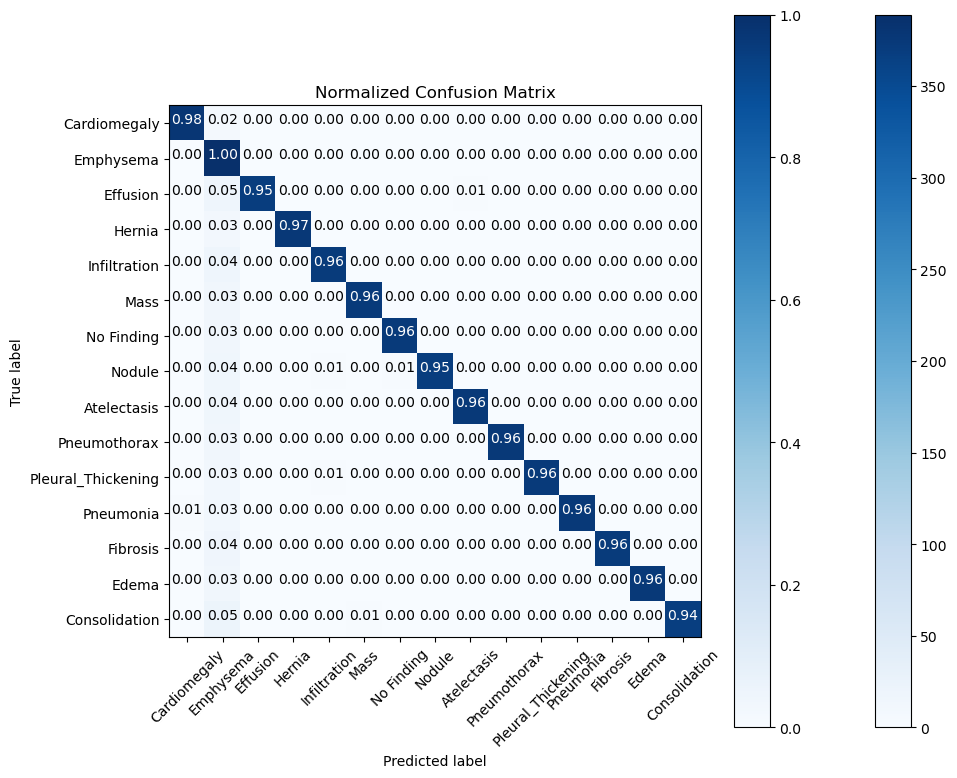

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

# Convert predictions from probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Get the class labels
classes = [
    'Cardiomegaly', 'Emphysema', 'Effusion', 'Hernia', 'Infiltration', 
    'Mass', 'No Finding', 'Nodule', 'Atelectasis', 'Pneumothorax', 
    'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema', 'Consolidation'
]

# Print the classification report
print(classification_report(y_test_classes, y_pred_classes, target_names=classes))

# Printing confusion matrix

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Normalize the confusion matrix
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Plot the numbers in the confusion matrix
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], '.2f'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()